# Binary Search

The binary search algorithm looks for a number x in a sorted list by splitting the list into halves and keeping the half containing x. This process is repeated recursively until finding x or the closest element in the list. 
An algorithm's time complexity is often estimated in the worst case senario. For binary search, the worse case is given by the maximum number of steps needed to find an arbitrary number x in a sorted list of size N. 
At each step the size of the input is divided by two. Therefore, the number of steps is equal to the number of times we can split N by two.

**1. How many steps does it take to find x in an array with 4, 8, 16, 32 elements?**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.xkcd() # uncomment to get xkcd-like plot

In [2]:
# calculate steps to split data in binary search and return a data frame 
def calc_steps_binary_search(*array_sizes):
    df = []
    for size in array_sizes:
        steps = 0
        el = size
        while (el > 1): 
            steps += 1
            el /= 2
        df.append([size, steps])
    return pd.DataFrame(df, columns = ['size', 'steps'])

array_sizes = [2, 4, 8, 16, 32, 64]
binary_search_df = calc_steps_binary_search(*array_sizes)
binary_search_df

,size,steps
0,2,1
1,4,2
2,8,3
3,16,4
4,32,5
5,64,6


**2. Plot input size vs. step**

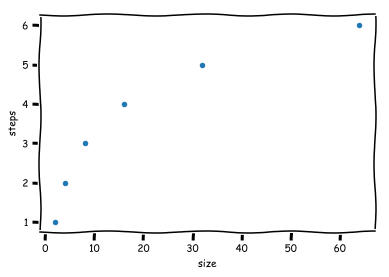

In [3]:
binary_search_df.plot(x='size', y='steps', kind='scatter')
plt.show()


**3. Do you see any pattern? If so, what kind of pattern do you see?**  
Looks like a logarithmic function.

# Logarithmic Scale

Events, such as the formation of our solar system, the invention of writing and the time of your last breakfast can be visualised in a timeline.
However, because the time elapsed since the occurrence of these events has very different time scales, visualising them in a timeline takes a lot of space.  
https://waitbutwhy.com/2013/08/putting-time-in-perspective.html
Here we'll use the logarithmic scale to visualise a timeline of events comprising numerous time scales.
A. Create your data 
-------------------------------

i. Create a table (eg. in excel) with the following columns

----------------------------------------------------------------------------------------------------------------------------------------------------
| event name    | elapsed time (arbitrary units)   | conversion factor     | elapsed time (days)     |
----------------------------------------------------------------------------------------------------------------------------------------------------

The third column contains the conversion factor between the arbitrary time units in the second column and the time in days (fourth column). For example, the conversion factor between years and days is 365 days/ 1 year.

Fill the table with events occurring over different time scales (min 10 rows).

ii. Save table as a CSV file.

In [4]:
# read-in CSV file
df = pd.read_csv('timeline_hours.csv')
df.head()

,event_name,elapsed_time,conversion factor,elapsed_time_(hours)
0,1969: ARPANET first message sent,50.0,8760,438000.0
1,1982: TCP/IP invented,35.0,8760,306600.0
2,1983: DNS,34.0,8760,297840.0
3,1990: Tim Berners-Lee develops HTML,29.0,8760,254040.0
4,1991: CERN introduces World Wide Web,28.0,8760,245280.0


ii. Plot the events as vertical lines. You can use matplotlib.pyplot.vline (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.vlines.html) 

Beautify the plot annotating the events, removing frame, etc.

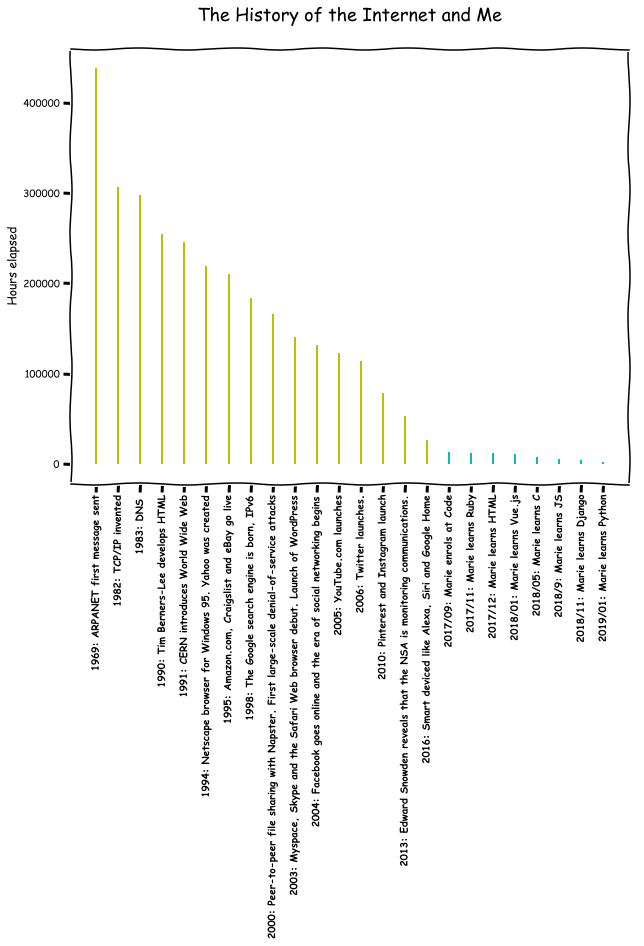

In [5]:
#parameters
plt.rcParams['figure.figsize']= [10,8]
my_colors = 'y'*16 + 'c'* 8 

# plot
plt.vlines(df.event_name, 0, df['elapsed_time_(hours)'], colors=my_colors)

#titles
plt.xlabel('')
plt.ylabel('Hours elapsed', fontsize=12)
plt.title('The History of the Internet and Me', fontsize=18).set_position([.5, 1.05])
plt.xticks(rotation='vertical', fontweight='bold')

plt.show()

iii. Use plt.xscale('log') to use log scale.

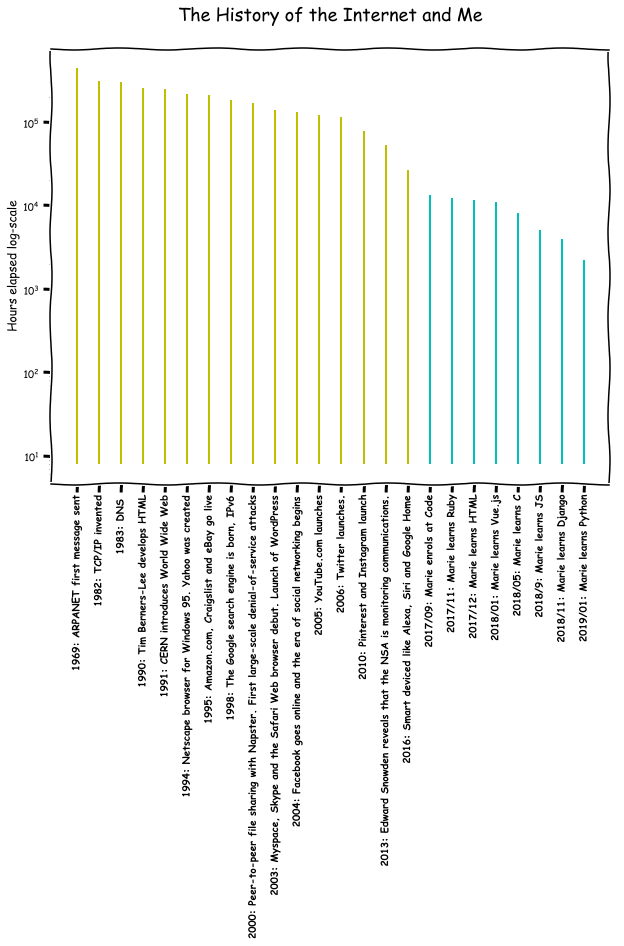

In [6]:
#parameters
plt.rcParams['figure.figsize']= [10,8]

# plot
plt.yscale('log')
plt.vlines(df.event_name, 10^2 , df['elapsed_time_(hours)'], colors=my_colors)

#titles
plt.xlabel('')
plt.ylabel('Hours elapsed log-scale', fontsize=12)
plt.title('The History of the Internet and Me', fontsize=18).set_position([.5, 1.05])
plt.xticks(rotation='vertical', fontweight='bold')

plt.show()

**Draw timeline**

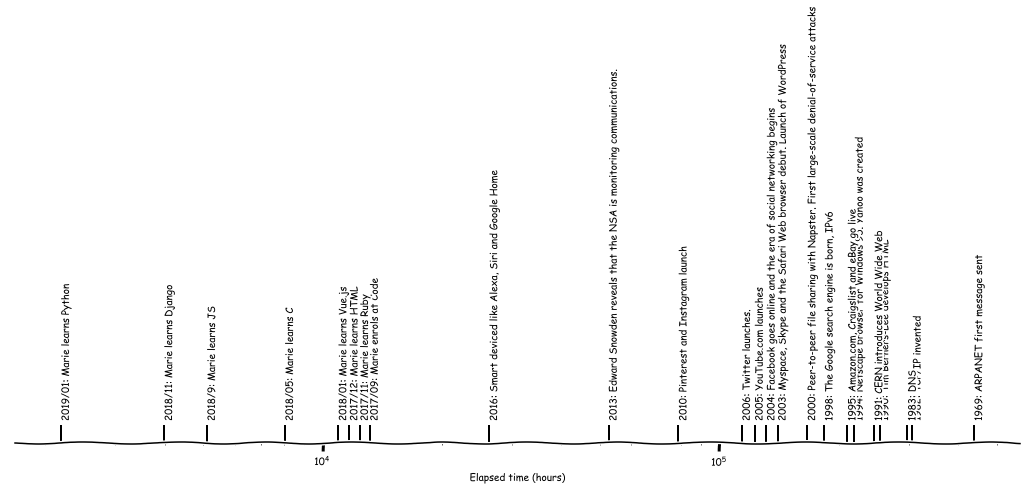

In [7]:
fig, ax = plt.subplots(figsize=(18,2))

for i, r in df.iterrows():
    time = r.loc['elapsed_time_(hours)']
    ax.vlines(time, 0, 0.5)
    ax.text(time, 0.6, r.loc['event_name'], rotation=90, verticalalignment='bottom')
    
ax.set_xscale("log")
ax.set_ylim(0, 3)
ax.set_xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks([])

ax.set_xlabel('Elapsed time (hours)')

plt.show()